# Information Gain, Information Gain Ratio, & Gini Index

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Weather.csv')

In [3]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [4]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
target_variable = 'Play'
input_variables = df.columns[df.columns!=target_variable]

In [6]:
def DistributionEntropy(fc):
    """Computes the entropy given a frequency count fc
       represented using an numpy array
    
        [10, 0] corresponds to a distribution of [1.0, 0.0]
        which corresponds to an entropy of 0.0
        
        distribution [0.5 0.5] has entropy 1.0
    """
    
    d = fc/sum(fc)
    
    return sum([ - x * math.log(x,2) for x in d[d!=0] ])

In [7]:
entropy = [DistributionEntropy(np.array(fc)) for fc in zip(np.arange(0,1.05,0.05), 1- np.arange(0,1.05,0.05))]

In [8]:
entropy

[0.0,
 0.28639695711595625,
 0.4689955935892812,
 0.6098403047164005,
 0.7219280948873623,
 0.8112781244591328,
 0.8812908992306927,
 0.9340680553754912,
 0.9709505944546686,
 0.9927744539878084,
 1.0,
 0.9927744539878084,
 0.9709505944546687,
 0.934068055375491,
 0.8812908992306925,
 0.8112781244591328,
 0.7219280948873623,
 0.6098403047164002,
 0.46899559358928117,
 0.2863969571159558,
 0.0]

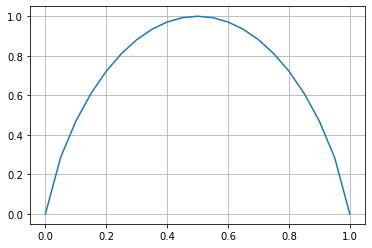

In [9]:
x = np.arange(0,1.05,0.05)
plt.plot(x,entropy)
plt.grid()

In [10]:
DistributionEntropy(df['Play'].value_counts())

0.9402859586706309

In [11]:
[x for x in range(5)]

[0, 1, 2, 3, 4]

In [12]:
def AttributeEntropy(attribute,target):
    # distribution corresponding to each attribute value
    # weighted sum
    
    weights = attribute.value_counts()/sum(attribute.value_counts())
    attribute_values = attribute.value_counts().index
    
    entropy = 0
    
    for i,value in enumerate(attribute_values):
        mask = attribute==value
        entropy = entropy + weights[i] * DistributionEntropy(target[mask].value_counts())
        
    return entropy

In [13]:
def InformationGain(attribute,target):
    # original entropy
    original_entropy = DistributionEntropy(target.value_counts())
    
    # attribute entropy 
    attribute_entropy = AttributeEntropy(attribute,target)
    
    # return the difference
    return original_entropy - attribute_entropy

In [14]:
InformationGain(df['Outlook'],df['Play'])

0.2467498197744391

In [15]:
def IntrinsicInfo(attribute):
    return DistributionEntropy(attribute.value_counts())

In [16]:
def InformationGainRatio(attribute, target):
    return InformationGain(attribute, target)/IntrinsicInfo(attribute)


In [17]:
for attribute in input_variables:
    print(attribute + " " + str(InformationGainRatio(df[attribute], df[target_variable])))

Outlook 0.15642756242117517
Temperature 0.01877264622241867
Humidity 0.15183550136234136
Windy 0.048848615511520595


In [18]:
IntrinsicInfo(df['Outlook'])

1.577406282852345

In [19]:
InformationGain(df['Outlook'], df['Play'])

0.2467498197744391

In [20]:
def GiniIndex(fc):
    d = np.array(fc/sum(fc))
    return 1 - np.dot(d,d)

In [21]:
def AttributeGiniIndex(attribute,target):
    # distribution corresponding to each attribute value
    # weighted sum
    
    weights = attribute.value_counts()/sum(attribute.value_counts())
    attribute_values = attribute.value_counts().index
    
    gini = 0
    
    for i,value in enumerate(attribute_values):
        mask = attribute==value
        gini = gini + weights[i] * GiniIndex(target[mask].value_counts())
        
    return gini

In [22]:
gini = [GiniIndex(np.array(fc)) for fc in zip(np.arange(0,1.05,0.05), 1- np.arange(0,1.05,0.05))]

In [23]:
error = [min(x) for x in zip(np.arange(0,1.05,0.05), 1- np.arange(0,1.05,0.05))]

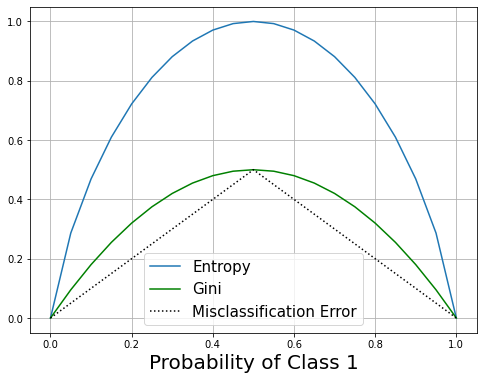

In [24]:
x = np.arange(0,1.05,0.05)
plt.figure(figsize=(8,6))
plt.plot(x,entropy,label='Entropy')
plt.plot(x,gini,label='Gini',c='Green')
plt.plot(x,error,label='Misclassification Error',c='Black',ls=':')
plt.legend(fontsize=15)
plt.xlabel('Probability of Class 1',fontsize=20)
plt.grid()
plt.savefig("EntropyGiniComparison.png")

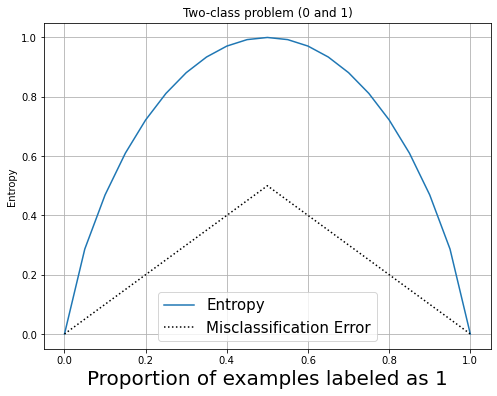

In [25]:
x = np.arange(0,1.05,0.05)
plt.figure(figsize=(8,6))
plt.plot(x,entropy,label='Entropy')
# plt.plot(x,gini,label='Gini',c='Green')
plt.plot(x,error,label='Misclassification Error',c='Black',ls=':')
plt.legend(fontsize=15)
plt.xlabel('Proportion of examples labeled as 1',fontsize=20)
plt.ylabel('Entropy')
plt.title("Two-class problem (0 and 1)")
plt.grid()
plt.savefig("EntropyComparison.png")

In [26]:
label = ['+','-','-','-','+','+','-','-','+','+']
a = ['0','0','0','0','0','1','1','1','1','1']
b = ['0','0','1','1','0','0','0','0','1','0']
c = ['0','1','1','1','1','1','1','1','1','1']

df_abc = pd.DataFrame({'a':a,'b':b,'c':c,'class':label})

df_abc.to_csv('abc_dataset.csv',index=False)

In [27]:
InformationGain(df_abc['c'],df_abc['class'])

0.10803154614559995

In [28]:
DistributionEntropy(df_abc['class'].value_counts())

1.0

In [29]:
AttributeEntropy(df_abc['a'],df_abc['class'])

0.9709505944546686

In [30]:
InformationGain(df_abc['a'],df_abc['class'])

0.02904940554533142

In [31]:
InformationGain(df_abc['b'],df_abc['class'])

0.034851554559677034

In [32]:
InformationGain(df_abc['c'],df_abc['class'])

0.10803154614559995

In [33]:
AttributeGiniIndex(df['Windy'],df['Play'])

0.42857142857142855

In [34]:
AttributeGiniIndex(df_abc['a'],df_abc['class'])

0.48

In [35]:
AttributeGiniIndex(df_abc['b'],df_abc['class'])

0.4761904761904763

In [36]:
AttributeGiniIndex(df_abc['c'],df_abc['class'])

0.4444444444444444

In [37]:
a=[0.22,0.31,0.31,0.31,0.33,0.41,0.43]
label=['0','0','1','0','1','1','1']

single_continuous_dataset = pd.DataFrame({'A':a,'Class':label})


In [38]:
np.sort(single_continuous_dataset['A'].unique())

array([0.22, 0.31, 0.33, 0.41, 0.43])

In [1]:
def ContinuousAttributeGini(attribute,target):
    # distribution corresponding to each attribute value
    # weighted sum
    
    original_gini = GiniIndex(target.value_counts())


    values = np.sort(attribute.unique())

    print(values)
    # number of rows
    n = attribute.shape[0]
    
    # number of values
    nv = values.shape[0]


    gini_value = np.zeros(nv)
    gini_split = np.zeros(nv)
    
    
    for i,value in enumerate(values):
        left_mask = attribute<=value
        right_mask = ~left_mask
        
        print("<<",target[left_mask].value_counts(),">>")
        print("<<",target[right_mask].value_counts(),">>")


        left_gini = GiniIndex(target[left_mask].value_counts())
        right_gini = GiniIndex(target[right_mask].value_counts())
        
        left_weight = sum(left_mask)/n
        right_weight = sum(right_mask)/n
        
        gini_index = left_weight*left_gini - right_weight*right_gini

        gini_value[i] = original_gini - gini_index
        if (i==(nv-1)):
            gini_split[i] = value
        else:
            gini_split[i] = (value+values[i+1])/2.0

        print("%d split %.3f gini %.3f"%(i,gini_split[i],gini_value[i]))
    best = np.argmax(gini_value)
        
    return gini_split[best],gini_value[best]

In [40]:
ContinuousAttributeGini(single_continuous_dataset['A'],single_continuous_dataset['Class'])

[0.22 0.31 0.33 0.41 0.43]
<< 0    1
Name: Class, dtype: int64 >>
<< 1    4
0    2
Name: Class, dtype: int64 >>
0 split 0.265 gini -0.129
<< 0    3
1    1
Name: Class, dtype: int64 >>
<< 1    3
Name: Class, dtype: int64 >>
1 split 0.320 gini -0.296
<< 0    3
1    2
Name: Class, dtype: int64 >>
<< 1    2
Name: Class, dtype: int64 >>
2 split 0.370 gini -0.167
<< 0    3
1    3
Name: Class, dtype: int64 >>
<< 1    1
Name: Class, dtype: int64 >>
3 split 0.420 gini -0.082
<< 1    4
0    3
Name: Class, dtype: int64 >>
<< Series([], Name: Class, dtype: int64) >>
4 split 0.430 gini -0.020


(0.43, -0.020408163265305923)

In [41]:
test_a=np.arange(0,1,0.1)
test_label=['0','0','0','0','0','1','1','1','1','1']

test = pd.DataFrame({'A':test_a,'Class':test_label})

In [42]:
test

,A,Class
0,0.0,0
1,0.1,0
2,0.2,0
3,0.3,0
4,0.4,0
5,0.5,1
6,0.6,1
7,0.7,1
8,0.8,1
9,0.9,1


In [43]:
ContinuousAttributeGini(test['A'],test['Class'])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
<< 0    1
Name: Class, dtype: int64 >>
<< 1    5
0    4
Name: Class, dtype: int64 >>
0 split 0.050 gini -0.056
<< 0    2
Name: Class, dtype: int64 >>
<< 1    5
0    3
Name: Class, dtype: int64 >>
1 split 0.150 gini -0.125
<< 0    3
Name: Class, dtype: int64 >>
<< 1    5
0    2
Name: Class, dtype: int64 >>
2 split 0.250 gini -0.214
<< 0    4
Name: Class, dtype: int64 >>
<< 1    5
0    1
Name: Class, dtype: int64 >>
3 split 0.350 gini -0.333
<< 0    5
Name: Class, dtype: int64 >>
<< 1    5
Name: Class, dtype: int64 >>
4 split 0.450 gini -0.500
<< 0    5
1    1
Name: Class, dtype: int64 >>
<< 1    4
Name: Class, dtype: int64 >>
5 split 0.550 gini -0.333
<< 0    5
1    2
Name: Class, dtype: int64 >>
<< 1    3
Name: Class, dtype: int64 >>
6 split 0.650 gini -0.214
<< 0    5
1    3
Name: Class, dtype: int64 >>
<< 1    2
Name: Class, dtype: int64 >>
7 split 0.750 gini -0.125
<< 0    5
1    4
Name: Class, dtype: int64 >>
<< 1    1
Name: Class, dtype: i

(0.9, 0.0)

In [44]:
print(test_label)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1']


In [45]:
GiniIndex(np.array([6,3]))

0.4444444444444444

In [46]:
9/14*GiniIndex(np.array([6,3]))+5/14*GiniIndex(np.array([3,2]))

0.45714285714285713